In [1]:
# Use the edgelist CSV formatted file to build graphs for visualization (Networkx, matplotlib) 
import os
import pandas as pd
import numpy as np
import csv
import seaborn as sns

import networkx as nx

# matplotlib graphs will be included in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."

# Getting output filename generated by xml_sax_parser 
author_edgelist_file = "./datasets/BhowmickSouravS.csv" # BhowmickSouravS.csv Leskovec-Jure.csv

def save_fig(filename, tight_layout=True):
    data_path = os.path.join(PROJECT_ROOT_DIR, "images")    
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    
    fullpath_filename = os.path.join(data_path, filename + ".jpg")
    print("Saving image : ", fullpath_filename)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fullpath_filename, format='jpg', dpi=300)

In [2]:
# This file contains all edges to be constructed
# Duplicate edges will be represented as only 1 edge forming the group of unique venues (equals to the degree of author)
df = pd.read_csv(author_edgelist_file) 
df.shape

(602, 2)

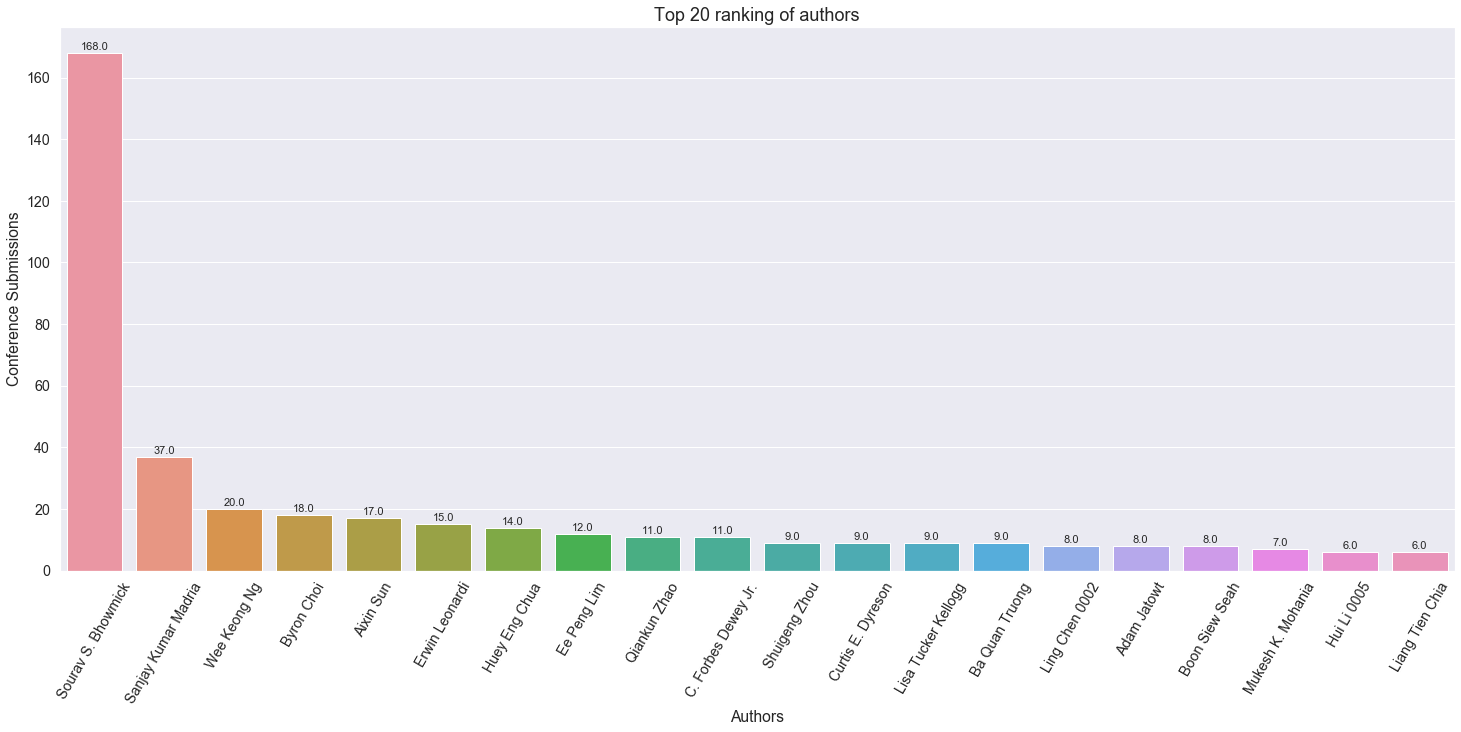

Total no. of authors : 152
Missing Data for authors : 0.00%
Top 20 :
 Author
Sourav S. Bhowmick      Sourav S. Bhowmick
Sanjay Kumar Madria    Sanjay Kumar Madria
Wee Keong Ng                  Wee Keong Ng
Byron Choi                      Byron Choi
Aixin Sun                        Aixin Sun
Erwin Leonardi              Erwin Leonardi
Huey Eng Chua                Huey Eng Chua
Ee Peng Lim                    Ee Peng Lim
Qiankun Zhao                  Qiankun Zhao
C. Forbes Dewey Jr.    C. Forbes Dewey Jr.
Lisa Tucker Kellogg    Lisa Tucker Kellogg
Ba Quan Truong              Ba Quan Truong
Shuigeng Zhou                Shuigeng Zhou
Curtis E. Dyreson        Curtis E. Dyreson
Ling Chen 0002              Ling Chen 0002
Adam Jatowt                    Adam Jatowt
Boon Siew Seah              Boon Siew Seah
Mukesh K. Mohania        Mukesh K. Mohania
Hui Li 0005                    Hui Li 0005
Liang Tien Chia            Liang Tien Chia
Name: author, dtype: object
Total number of conference submissi

In [3]:
# Plotting top rank authors
author_Grp = pd.DataFrame()
author_Grp['authorCount'] = df.groupby(['Author'])['Author'].count()
author_Grp['author'] = author_Grp.index
topmost = 20
total_counts = len(df)
bar_text_filler = 1

# There are too many authors, so we will subset the top authors
author_Grp_top = author_Grp.sort_values(by='authorCount',ascending=False).head(topmost)
order_authors = author_Grp_top.sort_values(by='authorCount',ascending=False)['author']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='author', y='authorCount', data=author_Grp_top, order=order_authors)
ax.set_title('Top ' + str(topmost) + ' ranking of authors', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + bar_text_filler,
            count, # '{:1.2f}%'.format(count/total_counts*100) to get %
            ha="center", fontsize=11)


xt = plt.xticks(rotation=60)
plt.xlabel('Authors')
plt.ylabel('Conference Submissions')
plt.show()

print("Total no. of authors :", len(author_Grp.index))
print("Missing Data for authors : " +
      '{:1.2f}%'.format(df['Author'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", author_Grp_top['author'])
print("Total number of conference submissions for all authors (include duplicate venues for co-authors) : ", total_counts)

for ctr in range(len(author_Grp_top)):
    if (author_Grp_top.iloc[ctr]['author'] == -999):
        print("Found in Index", str(ctr) + ":", author_Grp_top.iloc[ctr]['authorCount'])
        print("Missing Data : " + '{:1.2f}%'.format(author_Grp_top.iloc[ctr]['authorCount'] / total_counts * 100))


In [4]:
# Get author list for each unique venue
Venue_Authors = pd.DataFrame()
Venue_Authors['author_list'] = df.groupby('Venue')['Author'].unique()

print("CIKM authors are ", Venue_Authors['author_list']['CIKM'])
print("No. of venues : ", Venue_Authors.shape[0])

Venue_Authors['author_list']

CIKM authors are  ['Xi Lin' 'Yequan Wang' 'Xiaokui Xiao' 'Zengxiang Li' 'Sourav S. Bhowmick'
 'Adam Jatowt' 'Ricardo Campos 0001' 'Antoine Doucet' 'Nina Tahmasebi'
 'Siyuan Wu' 'Leong Hou U' 'Wolfgang Gatterbauer' 'Curtis E. Dyreson'
 'Byron Choi' 'Min Hwee Ang' 'Wenqing Lin' 'James Cheng' 'Hui Li 0005'
 'Aixin Sun' 'Erwin Leonardi' 'Zhifeng Ng' 'Qiankun Zhao' 'Xin Zheng'
 'Kai Yi' 'Hongmei Sun' 'Le Gruenwald' 'Yang Song' 'Mukesh K. Mohania'
 'Yahiko Kambayashi' 'Vivek Vedagiri' 'Amey V. Laud']
No. of venues :  51


Venue
ACL (1)                                                [Yating Zhang, Adam Jatowt, Sourav S. Bhowmick...
ACM Multimedia                                         [Sourav S. Bhowmick, Aixin Sun, Ba Quan Truong...
ADL                                                    [Wee Keong Ng, Ee Peng Lim, C. T. Huang, Soura...
APWeb                                                          [Sourav S. Bhowmick, Sanjay Kumar Madria]
BCB                                                    [Huey Eng Chua, Sourav S. Bhowmick, Lisa Tucke...
BigComp                                                   [Sourav S. Bhowmick, Huey Eng Chua, Jie Zheng]
CIDR                                                     [Sourav S. Bhowmick, Byron Choi, Shuigeng Zhou]
CIKM                                                   [Xi Lin, Yequan Wang, Xiaokui Xiao, Zengxiang ...
CoopIS/DOA/ODBASE                                      [Sanjay Kumar Madria, Mohammed Baseer, Sourav ...
CoopIS/DOA/ODBASE (2)                            

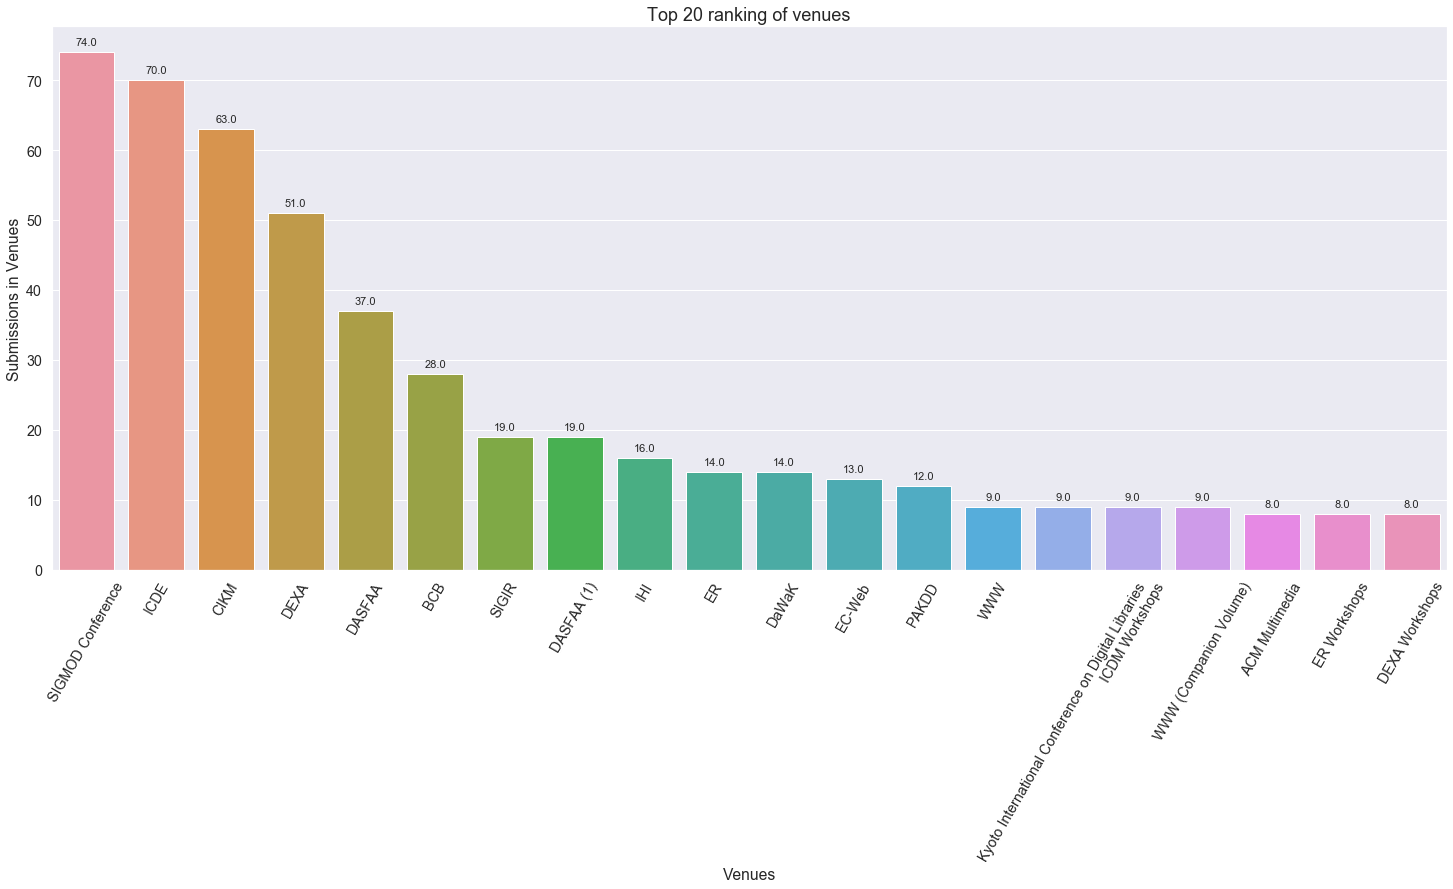

Total no. of venues : 51
Missing Data for venues : 0.00%
Top 20 :
 Venue
SIGMOD Conference                                                                      SIGMOD Conference
ICDE                                                                                                ICDE
CIKM                                                                                                CIKM
DEXA                                                                                                DEXA
DASFAA                                                                                            DASFAA
BCB                                                                                                  BCB
SIGIR                                                                                              SIGIR
DASFAA (1)                                                                                    DASFAA (1)
IHI                                                                                    

In [5]:
# Plotting top rank venues
venue_Grp = pd.DataFrame()
venue_Grp['venueCount'] = df.groupby(['Venue'])['Venue'].count()
venue_Grp['venue'] = venue_Grp.index

# Check if ranking is less than topmost
no_Filtered_Venues = Venue_Authors.shape[0]
if no_Filtered_Venues < topmost:
    topmost = no_Filtered_Venues

# There are too many authors, so we will subset the top authors
venue_Grp_top = venue_Grp.sort_values(by='venueCount',ascending=False).head(topmost)
order_venues = venue_Grp_top.sort_values(by='venueCount',ascending=False)['venue']

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x='venue', y='venueCount', data=venue_Grp_top, order=order_venues)
ax.set_title('Top ' + str(topmost) + ' ranking of venues', fontsize=18)
for rectBox in ax.patches:
    count = rectBox.get_height()
    #print("Counts :", count)    
    ax.text(rectBox.get_x() + rectBox.get_width()/2.,
            count + bar_text_filler,
            count, # '{:1.2f}%'.format(count/total_counts*100) to get %
            ha="center", fontsize=11)


xt = plt.xticks(rotation=60)
plt.xlabel('Venues')
plt.ylabel('Submissions in Venues')
plt.show()

print("Total no. of venues :", len(venue_Grp.index))
print("Missing Data for venues : " +
      '{:1.2f}%'.format(df['Venue'].isnull().sum() / total_counts * 100))
print("Top " + str(topmost) + " :\n", venue_Grp_top['venue'])

for ctr in range(len(venue_Grp_top)):
    if (venue_Grp_top.iloc[ctr]['venue'] == -999):
        print("Found in Index", str(ctr) + ":", venue_Grp_top.iloc[ctr]['venueCount'])
        print("Missing Data : " + '{:1.2f}%'.format(venue_Grp_top.iloc[ctr]['venueCount'] / total_counts * 100))


# (1) Attempt to observe what venues/conferences are submitted by authors and ranked the topmost

In [6]:
by_author = df.groupby('Author')

#for author, frame in by_author:
#    print(frame, end="\n\n") # frame.head(2)

In [7]:
# Sum all the submissions for all authors = No. of edges in venue categories (with duplicate edges) = same as df rows
print("Total no. of submissions for all authors :", sum(by_author.count().values)) # sum of venue counts for all authors

Total no. of submissions for all authors : [602]


In [8]:
print("The most popular author :", author_Grp_top.iloc[0]['author'])
print("The first author in the author's group :", by_author.first().index[0])
print("The second author in the order of original dataframe :", by_author.head(1)['Author'][1]) # based on original index order

The most popular author : Sourav S. Bhowmick
The first author in the author's group : Adam Jatowt
The second author in the order of original dataframe : Yequan Wang


In [9]:
# No. of submissions for author based on unique venues/conferences whereby the groups should be the same as the degree value
most_popular_author = author_Grp_top.iloc[0]['author'] 
first_author_inGroupby = by_author.first().index[0]
authors = [most_popular_author, first_author_inGroupby]
authors_rank_df = pd.DataFrame()
author_submissions_df = pd.DataFrame()

for author in authors:
    print("\n", author)
    print("-------------------")
    unique_venues, counts = np.unique(by_author.get_group(author)['Venue'], return_counts=True) # Adam Jatowt, Ba Quan Truong
    print("No. of each venue for " + author + " (descending order) :", (sorted(counts, reverse = True)))

    # Value of 248 instead of 251 is because the 4 proceedings" tag with no authors and also an author for "NoBt" which account for no booktitles
    print("Total No. of submission for all unique venues for " + author + " :\n", by_author.get_group(author).count())

    # Initialize all
    first_tuple = second_tuple = third_tuple = fourth_tuple = fifth_tuple = ['', '']
        
    # Attempt to compute "Top 5" positions if they exist
    author_venues_counts = list(zip(unique_venues, counts))

    # Modifies the original list with descending sorting order
    author_venues_counts.sort(key=lambda x: x[1],reverse = True)

    author_unique_venue_count = len(author_venues_counts)
    print("No. of unique submitted venues for " + author + " :", author_unique_venue_count)

    if author_venues_counts[0][0] != 'NoBt':
        if author_unique_venue_count >= 5:
            fifth_tuple = [author, author_venues_counts[4]]
            fourth_tuple = [author, author_venues_counts[3]]
            third_tuple = [author, author_venues_counts[2]]
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 4:
            fourth_tuple = [author, author_venues_counts[3]]
            third_tuple = [author, author_venues_counts[2]]
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 3:
            third_tuple = [author, author_venues_counts[2]]
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 2:
            second_tuple = [author, author_venues_counts[1]]
            first_tuple = [author, author_venues_counts[0]]
        elif author_unique_venue_count >= 1:
            first_tuple = [author, author_venues_counts[0]]        
    else:                
        if author_unique_venue_count >= 5:
            fourth_tuple = [author, author_venues_counts[4]]
            third_tuple = [author, author_venues_counts[3]]
            second_tuple = [author, author_venues_counts[2]]
            first_tuple = [author, author_venues_counts[1]]
        elif author_unique_venue_count >= 4:
            third_tuple = [author, author_venues_counts[3]]
            second_tuple = [author, author_venues_counts[2]]
            first_tuple = [author, author_venues_counts[1]]
        elif author_unique_venue_count >= 3:
            second_tuple = [author, author_venues_counts[2]]
            first_tuple = [author, author_venues_counts[1]]
        elif author_unique_venue_count >= 2:
            first_tuple = [author, author_venues_counts[1]]

    print("The first position venue with total submission counts for " + author + " :", first_tuple)
    print("The second position venue with total submission counts for " + author + " :", second_tuple)
    print("The third position venue with total submission counts for " + author + " :", third_tuple)
    print("The fourth position venue with total submission counts for " + author + " :", fourth_tuple)
    print("The fifth position venue with total submission counts for " + author + " :", fifth_tuple)
    print("Venues and counts of " + author + " :\n", author_venues_counts)

    tmp_ranked_data = [first_tuple, second_tuple, third_tuple, fourth_tuple, fifth_tuple]
    ranked_data = [element for element in tmp_ranked_data if element != ['', '']]  # Strip empty ranking
    
    # Create the topmost ranking venues for each author that have venue grouped
    # ['Author', ('Venue', 'Count')] consider as 2 columns
    tmp_author_rank_df = pd.DataFrame.from_records(ranked_data, columns =['Author', 'Venues with counts'])
    authors_rank_df = authors_rank_df.append(tmp_author_rank_df, ignore_index=True) 
    
    print(authors_rank_df)
    print("--------------------" + author + "--------------------")

    # Create for authors having submissions for each venue respectively
    tmp_author_submissions_df = pd.DataFrame({'Author': author, 'Venue': unique_venues, 'Submissions': counts})
    author_submissions_df = author_submissions_df.append(tmp_author_submissions_df, ignore_index=True) 

print("-------------- Get info from index 4 --------------")
print("Author :", authors_rank_df.iloc[0])
print("at Venue :", authors_rank_df.iloc[0][1])
print("with Count:", authors_rank_df.iloc[0][1][1])
print("---------------------------------------------------")
print("List of authors having submissions for each unique venue respectively :")
author_submissions_df


 Sourav S. Bhowmick
-------------------
No. of each venue for Sourav S. Bhowmick (descending order) : [18, 16, 16, 16, 12, 7, 6, 6, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Total No. of submission for all unique venues for Sourav S. Bhowmick :
 Venue    168
dtype: int64
No. of unique submitted venues for Sourav S. Bhowmick : 51
The first position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', ('CIKM', 18)]
The second position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', ('DEXA', 16)]
The third position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', ('ICDE', 16)]
The fourth position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', ('SIGMOD Conference', 16)]
The fifth position venue with total submission counts for Sourav S. Bhowmick : ['Sourav S. Bhowmick', 

,Author,Venue,Submissions
0,Sourav S. Bhowmick,ACL (1),1
1,Sourav S. Bhowmick,ACM Multimedia,3
2,Sourav S. Bhowmick,ADL,1
3,Sourav S. Bhowmick,APWeb,1
4,Sourav S. Bhowmick,BCB,7
5,Sourav S. Bhowmick,BigComp,1
6,Sourav S. Bhowmick,CIDR,1
7,Sourav S. Bhowmick,CIKM,18
8,Sourav S. Bhowmick,CoopIS/DOA/ODBASE,1
9,Sourav S. Bhowmick,CoopIS/DOA/ODBASE (2),1


In [10]:
authors = sorted(list(df.Author.unique()))
print("Total no. of unique authors :", len(authors))

authors

Total no. of unique authors : 152


['Adam Jatowt',
 'Aixin Sun',
 'Amey V. Laud',
 'Antoine Doucet',
 'Aswani Rao Jannu',
 'Ba Quan Truong',
 'Benji Thian',
 'Bipin C. Sakamuri',
 'Boon Siew Seah',
 'Byron Choi',
 'C. Forbes Dewey Jr.',
 'C. T. Huang',
 'Changjiu Jin',
 'Chaohui Wang',
 'Chengkai Li',
 'Chris Raymond',
 'Christina Lui',
 'Chunyan Miao',
 'Curtis E. Dyreson',
 'Dadabhai T. Singh',
 'Devanshu Dhyani',
 'Dhruv Swamini',
 'Ee Peng Lim',
 'Eric Chaudhry',
 'Erwin Leonardi',
 'Fajar Ardian',
 'Feida Zhu 0001',
 'Fengqiong Qin',
 'Fengrong Li',
 'Gao Cong',
 'George Rajesh',
 'Haibo Hu 0001',
 'Hanry Yu',
 'Ho Hoang Hung',
 'Hong H. Nguyen',
 'Hong Jing Khok',
 'Hongmei Sun',
 'Huey Eng Chua',
 'Hui Li 0005',
 'Hyeonji Kim',
 'James Cheng',
 'Jeong Hoon Lee',
 'Jianfeng Ma',
 'Jiangtao Cui',
 'Jianliang Xu',
 'Jie Zheng',
 'Jin Yao Chin',
 'Jinbo Zhang',
 'Jintian Deng',
 'Jinyan Li',
 'Jun An Chong',
 'Jun Zhao',
 'Juneyoung Lee',
 'Kai Huang',
 'Kai Yi',
 'Kaiyu Feng',
 'Kalpdrum Passi',
 'Katsumi Tanaka',
 

In [11]:
authors_rank_df = pd.DataFrame()
author_submissions_df = pd.DataFrame()
topmost = 5
ranked_data = []
author_ranked_data = []

# for author, frame in by_author (alternative method)
for author in authors:
    unique_venues, counts = np.unique(by_author.get_group(author)['Venue'], return_counts=True) # Adam Jatowt, Ba Quan Truong
    
    num_unique_venues = len(unique_venues)
    #print("No. of unique venues for " + author + " : ", num_unique_venues)
    
    # Re-initialize ranked data list; clear causes complications in retaining the values
    # Caution : Maybe bugs in list clear; take a day to debug
    ranked_data = []

    # Attempt to compute "Top 5" positions
    author_venues_counts = list(zip(unique_venues, counts))

    # Modifies the original list with descending sorting order
    author_venues_counts.sort(key=lambda x: x[1],reverse = True)
    #print("Venues and counts of " + author + " :\n", author_venues_counts)

    # First venue is not 'NoBt'
    if author_venues_counts[0][0] != 'NoBt':
        # Not one less in case the 'NoBt'is in the middle of topmost venues and we can still pick topmost venues 
        if num_unique_venues > topmost:
            # Range runs from 0 to topmost-1 value inclusively; get only the values that is not "NoBt"
            for count in range(topmost):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                
                if author_venues_counts[count][0] != 'NoBt':
                    ranked_data.append(rank_tuple)
                #else:
                    #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
                    #print("Venue no. " + str(count + 1) + " in the middle is \"NoBt\"!")

            #print("Top " + str(topmost) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
            #print("--------------------------------------------")

        elif num_unique_venues > 0:
            # Range from 0 to num_unique_venues - 1 for correct indexing; get only the values that is not "NoBt"
            for count in range(num_unique_venues):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]

                if author_venues_counts[count][0] != 'NoBt':
                    ranked_data.append(rank_tuple)
                #else:
                    #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
                    #print("Venue no. " + str(count + 1) + " in the middle is \"NoBt\"!")
                
            #print("Only top " + str(num_unique_venues-1) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
            #print("--------------------------------------------")
        
        # Venues and counts of any author must be at least 1 venue without "NoBt"
        # Thus, do not need to check num_unique_venues <= 0
    else:
        # First venue is 'NoBt'
        if num_unique_venues > topmost:
            # Range runs from 1 to topmost value inclusively; get the next value that is not "NoBt"
            for count in range(1, topmost + 1):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                ranked_data.append(rank_tuple)
            
            #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
            #print("Top " + str(topmost) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
        elif num_unique_venues > 1:
            # Range from 1 to num_unique_venues - 1 for correct indexing; get the next value that is not "NoBt"
            for count in range(1, num_unique_venues):
                #rank_tuple = [author, author_venues_counts[count]]
                rank_tuple = author_venues_counts[count]
                ranked_data.append(rank_tuple)
            
            #print(str(num_unique_venues) + " Venues and counts of " + author + " :\n", author_venues_counts)
            #print("Only top " + str(num_unique_venues - 1) + " ranked data without \"NoBt\" for " + author + " :\n", ranked_data)
        #else:
            #print("Venues and counts of " + author + " :\n", author_venues_counts)
            #print("No. of unique venues for " + author + " (must be at least 2 venues including \"NoBt\") : ", num_unique_venues)
            #print("----------------------No ranked data----------------------")

    # Create the topmost ranking venues for each author that have venue grouped
    author_ranked_data.append(ranked_data)
    #print("Author ranked data for " + author + " :\n", author_ranked_data)
    #print("====================================================================================")

    #tmp_author_rank_df = pd.DataFrame.from_records(ranked_data, columns =['Author', 'Venues with counts'])
    #tmp_author_rank_df = pd.DataFrame(data=ranked_data)
    #authors_rank_df = authors_rank_df.append(tmp_author_rank_df, ignore_index=True) 
    
    # Create for authors having submissions for each venue respectively
    tmp_author_submissions_df = pd.DataFrame({'Author': author, 'Venue': unique_venues, 'Submissions': counts})
    
    # Continuous index and need to equate to the original dataframe
    author_submissions_df = author_submissions_df.append(tmp_author_submissions_df, ignore_index=True)

authors_rank_df = pd.DataFrame(author_ranked_data, columns=['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5'], index=authors)
authors_rank_df

,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5
Adam Jatowt,"(SIGIR, 3)","(CIKM, 2)","(ACL (1), 1)","(DASFAA (1), 1)","(WSDM, 1)"
Aixin Sun,"(ACM Multimedia, 3)","(CIKM, 3)","(WWW (Companion Volume), 3)","(SIGIR, 2)","(DASFAA (2), 1)"
Amey V. Laud,"(CIKM, 1)","(DEXA, 1)","(ICDE, 1)","(VLDB, 1)",None
Antoine Doucet,"(CIKM, 2)",None,None,None,None
Aswani Rao Jannu,"(ICDE, 1)",None,None,None,None
Ba Quan Truong,"(SIGMOD Conference, 2)","(WWW (Companion Volume), 2)","(ACM Multimedia, 1)","(DASFAA (1), 1)","(DASFAA (2), 1)"
Benji Thian,"(ICDE, 1)",None,None,None,None
Bipin C. Sakamuri,"(EC-Web, 1)","(ER, 1)",None,None,None
Boon Siew Seah,"(SIGIR, 2)","(BCB, 1)","(DASFAA, 1)","(DASFAA (2), 1)","(ICDM Workshops, 1)"
Byron Choi,"(ICDE, 8)","(SIGMOD Conference, 6)","(CIDR, 1)","(CIKM, 1)","(DASFAA, 1)"


In [12]:
# Display ranked data with author name
authors_rank_df.loc[most_popular_author, :] # ['Sourav S. Bhowmick']

Rank 1                 (CIKM, 18)
Rank 2                 (DEXA, 16)
Rank 3                 (ICDE, 16)
Rank 4    (SIGMOD Conference, 16)
Rank 5               (DASFAA, 12)
Name: Sourav S. Bhowmick, dtype: object

In [13]:
# Accessing the individual elements
print("Check for None : ", authors_rank_df.iloc[80][3] == None)
print("Row 81 :\n", authors_rank_df.iloc[80])
print("\nRow 81, column 2 :", authors_rank_df.iloc[80][1])
print("Row 81, column 2, item 2 :", authors_rank_df.iloc[80][1][1])

Check for None :  False
Row 81 :
 Rank 1    (Kyoto International Conference on Digital Lib...
Rank 2                                            (CIKM, 1)
Rank 3                                            (DEXA, 1)
Rank 4                                           (DaWaK, 1)
Rank 5                                          (EC-Web, 1)
Name: Mukesh K. Mohania, dtype: object

Row 81, column 2 : ('CIKM', 1)
Row 81, column 2, item 2 : 1


In [14]:
venues = sorted(list(df.Venue.unique()))
print("Total no. of unique venues (incl. NoBt) :", len(venues))

venues

Total no. of unique venues (incl. NoBt) : 51


['ACL (1)',
 'ACM Multimedia',
 'ADL',
 'APWeb',
 'BCB',
 'BigComp',
 'CIDR',
 'CIKM',
 'CoopIS/DOA/ODBASE',
 'CoopIS/DOA/ODBASE (2)',
 'DASFAA',
 'DASFAA (1)',
 'DASFAA (2)',
 'DEXA',
 'DEXA (1)',
 'DEXA Workshops',
 'DOLAP',
 'DaWaK',
 'EC-Web',
 'EDBT',
 'ER',
 'ER (Workshops)',
 'ER Workshops',
 'FODO',
 'FQAS',
 'GRADES/NDA@SIGMOD/PODS',
 'ICDCS',
 'ICDE',
 'ICDE Workshops',
 'ICDM Workshops',
 'ICMR',
 'ICPADS',
 'ICSC',
 'IDEAS',
 'IHI',
 'KDD',
 'Kyoto International Conference on Digital Libraries',
 'MMDB',
 'Mobile Data Management',
 'OTM Conferences (1)',
 'PAKDD',
 'PKDD',
 'Pacific Symposium on Biocomputing',
 'SIGIR',
 'SIGMOD Conference',
 'VLDB',
 'WISE Workshops',
 'WSDM',
 'WSM@MM',
 'WWW',
 'WWW (Companion Volume)']

In [15]:
# Categorise submissions by venue per author same value as the number of edges in graph (ie. 472)
author_submissions_df

,Author,Venue,Submissions
0,Adam Jatowt,ACL (1),1
1,Adam Jatowt,CIKM,2
2,Adam Jatowt,DASFAA (1),1
3,Adam Jatowt,SIGIR,3
4,Adam Jatowt,WSDM,1
5,Aixin Sun,ACM Multimedia,3
6,Aixin Sun,CIKM,3
7,Aixin Sun,DASFAA (2),1
8,Aixin Sun,EDBT,1
9,Aixin Sun,ICMR,1


In [16]:
unique_index = pd.Index(list(authors_rank_df.index))
author_index = unique_index.get_loc(most_popular_author)
print("Most popular author's Index :", author_index)

Most popular author's Index : 108


In [17]:
# Locating author's index
Author_Venues = pd.DataFrame()

# Non-unique Conferences/Venues
Author_Venues['venue_list'] = df.groupby('Author')['Venue']
print("No. of authors : ", Author_Venues.shape[0])

# Author_Venues['venue_list'][0] gives the first author
author_Venue_List = Author_Venues['venue_list'][author_index] # 'Sourav S. Bhowmick'
authors_Venue_List = Author_Venues['venue_list']

# Gives the list of venues for first author, index 0 is the name of the author
print("List of venues for " + author_Venue_List[0] + " : \n", author_Venue_List[1])

# Participated Conferences/Venues for each author 
unique_values, counts = np.unique(author_Venue_List[1], return_counts=True)
conference_dict = dict(zip(unique_values, counts))

conference_dict
for idx in range(len(unique_values)):
    print(str(unique_values[idx]) + " : (" + str(counts[idx]) + ")")
    
print("Sum of participated conferences :", sum(counts))

print("\n\nList of venues for all authors :")

indx = 0
for author in authors_Venue_List:
    #print("Author :", author[0])
    #print("Venue List :", author[1])
    author_conference_dict = dict({author[0]: author[1]})
    print(author_conference_dict)
    if author[0] == 'Sourav S. Bhowmick':
        print("***************************")
        print("Found author at location : ", indx)
        print("***************************")

    print("==========")
    indx += 1

print("Final Index for author :", indx)

No. of authors :  152
List of venues for Sourav S. Bhowmick : 
 4                        CIKM
7                        CIKM
11                 DASFAA (1)
13     GRADES/NDA@SIGMOD/PODS
16                       ICDE
                ...          
583                      DEXA
587              ER Workshops
591                        ER
594              ER Workshops
598                      FODO
Name: Venue, Length: 168, dtype: object
ACL (1) : (1)
ACM Multimedia : (3)
ADL : (1)
APWeb : (1)
BCB : (7)
BigComp : (1)
CIDR : (1)
CIKM : (18)
CoopIS/DOA/ODBASE : (1)
CoopIS/DOA/ODBASE (2) : (1)
DASFAA : (12)
DASFAA (1) : (6)
DASFAA (2) : (4)
DEXA : (16)
DEXA (1) : (1)
DEXA Workshops : (3)
DOLAP : (1)
DaWaK : (4)
EC-Web : (3)
EDBT : (2)
ER : (4)
ER (Workshops) : (1)
ER Workshops : (2)
FODO : (1)
FQAS : (1)
GRADES/NDA@SIGMOD/PODS : (1)
ICDCS : (1)
ICDE : (16)
ICDE Workshops : (1)
ICDM Workshops : (2)
ICMR : (1)
ICPADS : (1)
ICSC : (1)
IDEAS : (1)
IHI : (3)
KDD : (1)
Kyoto International Conference on

## Setup filters only interested venues for plotting "author-venue" graph

In [18]:
# Tier 1 : VLDB, KDD
# Tier 2 : EDBT, ICDE, ICDM, SDM, CIKM
# Tier 3 : DASFAA, PAKDD, PKDD, DEXA
def intersection(list1, list2): 
    return list(set(list1) & set(list2))

# Read desired venues from configuration file (CSV formatted)
tier_venues_df = pd.read_csv('./interested_venues.csv')

tier_venues = tier_venues_df.values.flatten() # ndarray format
list(tier_venues)

['VLDB',
 'KDD',
 'EDBT',
 'ICDE',
 'ICDM',
 'SDM',
 'CIKM',
 'DASFAA',
 'PAKDD',
 'PKDD',
 'DEXA']

In [19]:
find_Venue = 'VLDB'
title = 'A'
year = 2020

if title and year and (find_Venue in tier_venues):
    print("Found : %s in year %s at %s", title, year, find_Venue)
else:
    print("Not found :", find_Venue)

Found : %s in year %s at %s A 2020 VLDB


Popular venues : ['ACL (1)', 'ACM Multimedia', 'ADL', 'APWeb', 'BCB', 'BigComp', 'CIDR', 'CIKM', 'CoopIS/DOA/ODBASE', 'CoopIS/DOA/ODBASE (2)', 'DASFAA', 'DASFAA (1)', 'DASFAA (2)', 'DEXA', 'DEXA (1)', 'DEXA Workshops', 'DOLAP', 'DaWaK', 'EC-Web', 'EDBT', 'ER', 'ER (Workshops)', 'ER Workshops', 'FODO', 'FQAS', 'GRADES/NDA@SIGMOD/PODS', 'ICDCS', 'ICDE', 'ICDE Workshops', 'ICDM Workshops', 'ICMR', 'ICPADS', 'ICSC', 'IDEAS', 'IHI', 'KDD', 'Kyoto International Conference on Digital Libraries', 'MMDB', 'Mobile Data Management', 'OTM Conferences (1)', 'PAKDD', 'PKDD', 'Pacific Symposium on Biocomputing', 'SIGIR', 'SIGMOD Conference', 'VLDB', 'WISE Workshops', 'WSDM', 'WSM@MM', 'WWW', 'WWW (Companion Volume)']
Sorted Tier venues : ['CIKM', 'DASFAA', 'DEXA', 'EDBT', 'ICDE', 'ICDM', 'KDD', 'PAKDD', 'PKDD', 'SDM', 'VLDB']
Intersected venues : ['CIKM', 'DASFAA', 'DEXA', 'EDBT', 'ICDE', 'KDD', 'PAKDD', 'PKDD', 'VLDB']
Interested venues not present : {'SDM', 'ICDM'}


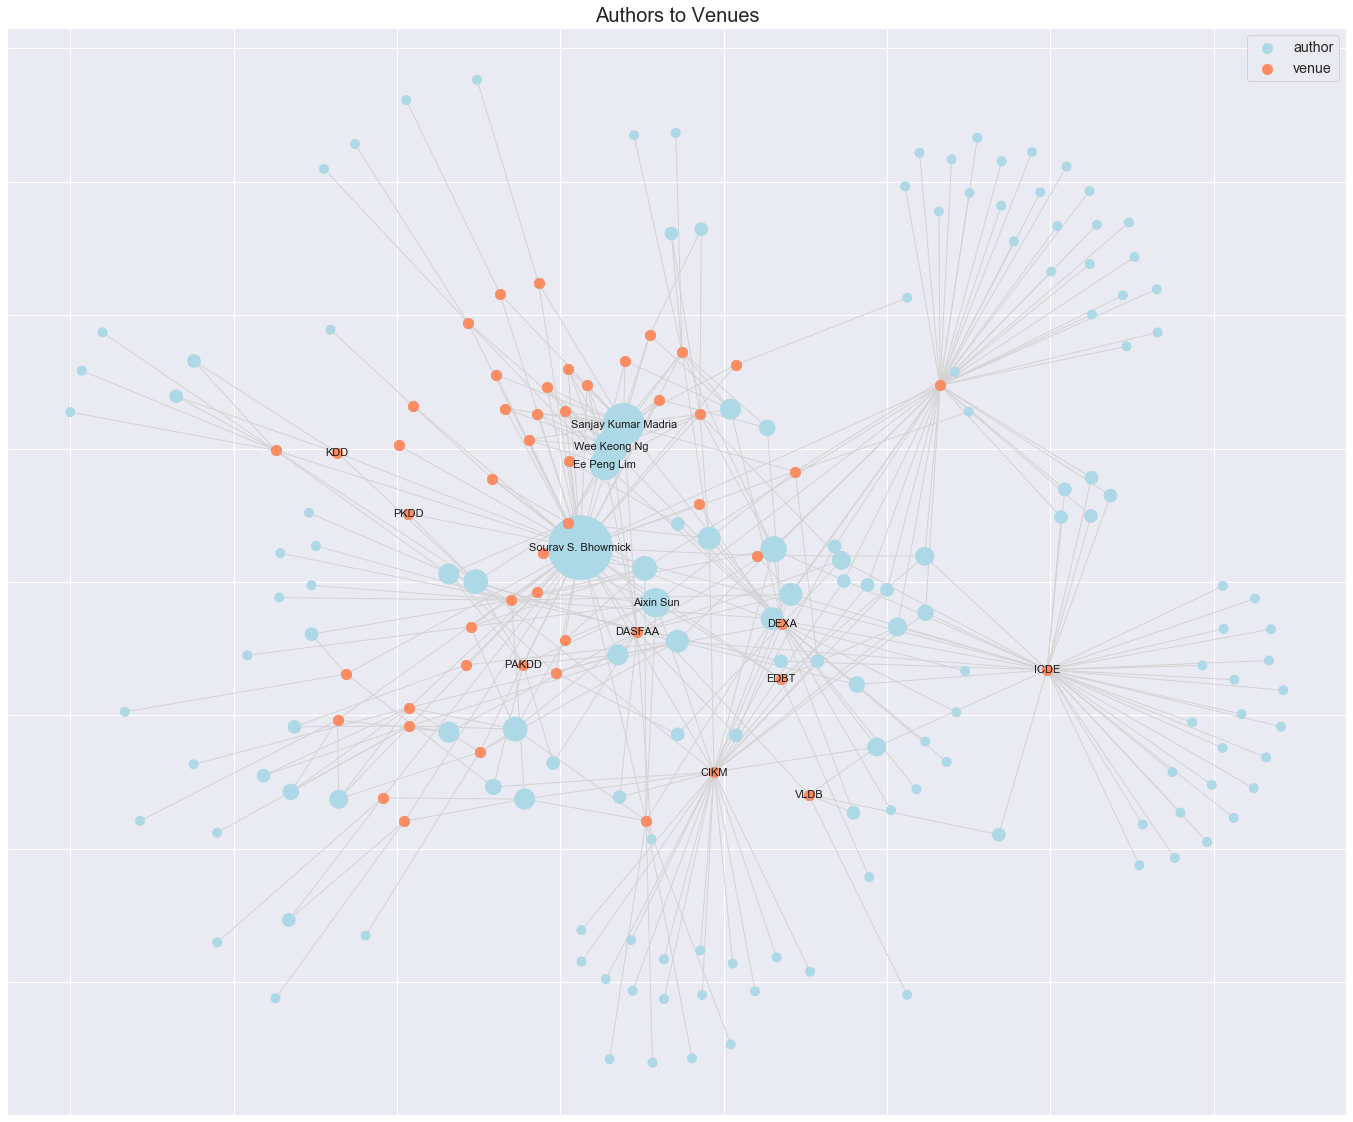

In [20]:
Graphtype = nx.Graph()

# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='Author', target='Venue', create_using=Graphtype)

#layout = nx.spring_layout(g)

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

plt.figure(figsize=(24, 20))

# 3. Draw the relevant graph with nodes and links
# People small and grey

# Labels for authors ONLY
# People who are highly connected are a highlighted color

# Obtain degree of authors and multiply by 80 to get the circle size
# The respective size is proportional to the number of connections, degree
author_size = [g.degree(author) * 80 for author in authors]

# List of Author nodes are determined from the authors list and displayed nodes in lightblue
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=authors, 
                       node_size=author_size, # a list of sizes, based on degree centrality
                       node_color='lightblue')

# List of Venue nodes are determined from the venues list and displayed nodes in grey
nx.draw_networkx_nodes(g, layout, nodelist=venues, node_color='#AAAAAA', node_size=100) #cccccc

# Create a list of popular venues
popular_venues = [venue for venue in venues if g.degree(venue) > 0]
print("Popular venues :", popular_venues)
sorted_tier_venues = sorted(tier_venues)
print("Sorted Tier venues :", sorted_tier_venues)

displayed_venues = sorted(intersection(tier_venues, popular_venues))
print("Intersected venues :", displayed_venues)
venues_difference = set(tier_venues).symmetric_difference(displayed_venues)
print("Interested venues not present :", venues_difference)

# Create a list of popular authors
popular_authors = [author for author in authors if g.degree(author) > 8] # For filtered venues, use 2
# Create nodes for popular authors mainly for legend labelling
nx.draw_networkx_nodes(g, layout, nodelist=popular_authors, node_color='lightblue', node_size=100, label='author') # lightblue

# List of popular venue nodes are determined from the popular_venues list and displayed nodes in orange
nx.draw_networkx_nodes(g, layout, nodelist=popular_venues, node_color='#fc8d62', node_size=100, label='venue') # orange

# Links/Edges are thin and displayed in lightgrey
nx.draw_networkx_edges(g, layout, width=1, edge_color="lightgrey") #cccccc

# Label the Venues
venue_labels = dict(zip(venues, venues))
displayed_venues_labels = dict(zip(displayed_venues, displayed_venues))

# Label the authors
authors_labels = dict(zip(authors, authors))
popular_authors_labels = dict(zip(popular_authors, popular_authors))

nx.draw_networkx_labels(g, layout, labels=popular_authors_labels, font_size=11) # author_labels
nx.draw_networkx_labels(g, layout, labels=displayed_venues_labels, font_size=11) # venue_labels
# font_family="sans-serif"

# 4. Turn off the axis
#plt.axis('off')
#nx.draw_networkx(g, layout)

plt.legend(loc='best')

plt.title("Authors to Venues", fontsize=20)
#save_fig("BhowmickSouravS_conf_graph")

# To remove node label coordinates and have matplotlib to show display
plt.show()

In [21]:
len(g.nodes) # Total no. of authors (175) and conferences (56)

203

In [22]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 203
Number of edges: 370
Average degree:   3.6453


## Property 1 : Small-world phenomenon

In [23]:
N = nx.number_of_nodes(g)
L = nx.number_of_edges(g)
dMax = nx.distance_measures.diameter(g)
k = (2 * L) / N

# work automatically for directed/undirected graph, should have to multiply by 2 for undirected graph
d = nx.average_shortest_path_length(g)

print("Diameter of graph : ", dMax)
print("Average degree of graph, <k> : ", float("{0:.4f}".format(k)))

print("Is this a directed graph : ", g.is_directed())
print("Average distance of graph : ", float("{0:.4f}".format(d)))

d_rand = np.log(N) / np.log(k)
print("Random network distance estimate, ln N/ln <k> : ", float("{0:.4f}".format(d_rand)))

Diameter of graph :  4
Average degree of graph, <k> :  3.6453
Is this a directed graph :  False
Average distance of graph :  3.2101
Random network distance estimate, ln N/ln <k> :  4.1078


In [24]:
degree_dict = (dict(g.degree))
degree_dict_values = degree_dict.values()
degree_dict_keys = degree_dict.keys()

max_dict_value = max(degree_dict_values)
max_dict_key = max(degree_dict, key=lambda k: degree_dict[k])

print("Degree Dictionary : ", degree_dict)
print("Max. degree : ", max_dict_value)
print("Max. degree key : ", max_dict_key)
print("Degree for venue, 'ICDE' :", degree_dict['ICDE'])

# Values for degrees are categories for unique conferences or authors; there might be multiple duplicates links/edges
# They are different from the unique values for book titles and respective counts in the total submissions/participations

Degree Dictionary :  {'Xi Lin': 1, 'CIKM': 31, 'Yequan Wang': 1, 'Xiaokui Xiao': 3, 'Zengxiang Li': 1, 'Sourav S. Bhowmick': 51, 'Adam Jatowt': 5, 'Ricardo Campos 0001': 1, 'Antoine Doucet': 1, 'Yijun Duan': 1, 'DASFAA (1)': 13, 'Masatoshi Yoshikawa': 1, 'GRADES/NDA@SIGMOD/PODS': 1, 'Chaohui Wang': 1, 'ICDE': 40, 'Miao Xie': 1, 'Byron Choi': 6, 'Shuigeng Zhou': 4, 'Nathan Ng': 1, 'Peipei Yi': 1, 'Zhiwei Zhang': 1, 'Jianliang Xu': 2, 'Christina Lui': 1, 'SIGIR': 10, 'Kai Huang': 1, 'SIGMOD Conference': 43, 'Huey Eng Chua': 6, 'Renchi Yang': 1, 'Zhewei Wei': 1, 'Jun Zhao': 1, 'Rong Hua Li': 1, 'Siyuan Liu': 1, 'Wanlu Zhang': 1, 'Shu Wang': 1, 'Wanyi Huang': 1, 'Shafiq R. Joty': 1, 'Yating Zhang': 2, 'WSDM': 4, 'Yuji Matsumoto 0001': 1, 'Nina Tahmasebi': 1, 'Kaiyu Feng': 2, 'Tao Guo': 1, 'Gao Cong': 2, 'Shuai Ma 0001': 2, 'Boon Siew Seah': 7, 'Aixin Sun': 10, 'Min Min Chew': 1, 'Yinglong Song': 1, 'Siyuan Wu': 2, 'Leong Hou U': 2, 'Wolfgang Gatterbauer': 2, 'BCB': 9, 'Lisa Tucker Kellogg'

In [25]:
degree_list = list((g.degree))
degree_list

[('Xi Lin', 1),
 ('CIKM', 31),
 ('Yequan Wang', 1),
 ('Xiaokui Xiao', 3),
 ('Zengxiang Li', 1),
 ('Sourav S. Bhowmick', 51),
 ('Adam Jatowt', 5),
 ('Ricardo Campos 0001', 1),
 ('Antoine Doucet', 1),
 ('Yijun Duan', 1),
 ('DASFAA (1)', 13),
 ('Masatoshi Yoshikawa', 1),
 ('GRADES/NDA@SIGMOD/PODS', 1),
 ('Chaohui Wang', 1),
 ('ICDE', 40),
 ('Miao Xie', 1),
 ('Byron Choi', 6),
 ('Shuigeng Zhou', 4),
 ('Nathan Ng', 1),
 ('Peipei Yi', 1),
 ('Zhiwei Zhang', 1),
 ('Jianliang Xu', 2),
 ('Christina Lui', 1),
 ('SIGIR', 10),
 ('Kai Huang', 1),
 ('SIGMOD Conference', 43),
 ('Huey Eng Chua', 6),
 ('Renchi Yang', 1),
 ('Zhewei Wei', 1),
 ('Jun Zhao', 1),
 ('Rong Hua Li', 1),
 ('Siyuan Liu', 1),
 ('Wanlu Zhang', 1),
 ('Shu Wang', 1),
 ('Wanyi Huang', 1),
 ('Shafiq R. Joty', 1),
 ('Yating Zhang', 2),
 ('WSDM', 4),
 ('Yuji Matsumoto 0001', 1),
 ('Nina Tahmasebi', 1),
 ('Kaiyu Feng', 2),
 ('Tao Guo', 1),
 ('Gao Cong', 2),
 ('Shuai Ma 0001', 2),
 ('Boon Siew Seah', 7),
 ('Aixin Sun', 10),
 ('Min Min Chew

In [26]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
dmax = max(degree_sequence)

print("Sorted degree sequence :", degree_sequence)
print("Max. degree :", dmax)

Sorted degree sequence : [51, 43, 40, 31, 22, 21, 17, 14, 13, 11, 10, 10, 10, 10, 9, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Max. degree : 51


In [27]:
degree_histogram = nx.degree_histogram(g)
print("Degree of an author :", g.degree('Sourav S. Bhowmick'))
print("No. of degree components (from 0 which is unconnected) :", len(degree_histogram))
print("Total no. of unique authors and conferences :", sum(degree_histogram))

Degree of an author : 51
No. of degree components (from 0 which is unconnected) : 52
Total no. of unique authors and conferences : 203


In [28]:
print("List of index and values :")

for index, value in zip(range(len(degree_histogram)), degree_histogram):
    print(index, value, end='; ')

List of index and values :
0 0; 1 100; 2 30; 3 14; 4 20; 5 10; 6 6; 7 4; 8 4; 9 1; 10 4; 11 1; 12 0; 13 1; 14 1; 15 0; 16 0; 17 1; 18 0; 19 0; 20 0; 21 1; 22 1; 23 0; 24 0; 25 0; 26 0; 27 0; 28 0; 29 0; 30 0; 31 1; 32 0; 33 0; 34 0; 35 0; 36 0; 37 0; 38 0; 39 0; 40 1; 41 0; 42 0; 43 1; 44 0; 45 0; 46 0; 47 0; 48 0; 49 0; 50 0; 51 1; 

## Property 2 : Scale-free

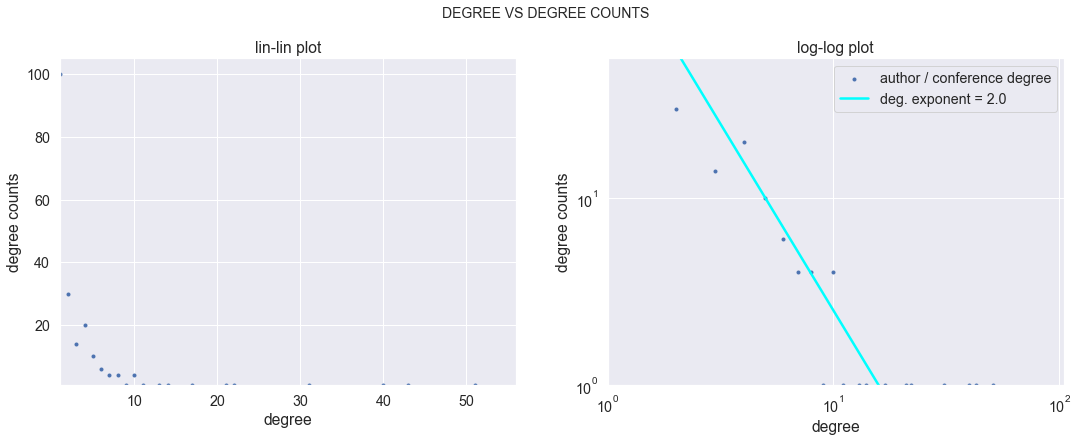

In [29]:
# The degrees here are for both the author (175) and conferences (56) 
degree_counts = degree_histogram
degree = list(range(len(degree_histogram)))

coeff = 250
power = -2.0
x = np.linspace(1, 100, num=10)
y = coeff * x**power
legend_labels = ['author / conference degree', 'deg. exponent = ' + str(-1*power)]
filler_space = 5

# Plotting graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Degree vs Degree Counts'.upper(), y=1.0, fontsize=14)

# Plot lin-lin graph on the left column
plt.subplot(1, 2, 1)

plt.xlabel(r'degree')
plt.xlim(1, max(degree) + filler_space)
plt.ylabel(r'degree counts')
plt.ylim(1, max(degree_counts) + filler_space)

#plt.legend(loc='best') # 'upper left'
plt.scatter(degree, degree_counts, marker='.')
plt.title(r'lin-lin plot')
plt.grid(True)

# Plot log-log graph on the right column
plt.subplot(1, 2, 2)
plt.xlabel('degree')
plt.xscale('log')
plt.xlim(1, max(degree_counts) + filler_space)
plt.ylabel('degree counts')
plt.yscale('log')
plt.ylim(1, max(degree) + filler_space)

plt.scatter(degree, degree_counts, marker='.', label=legend_labels[0])
plt.title('log-log plot')

# '$f(x) = '+str(power)+'\cdot x + \log('+ str(coeff) + ')$'
plt.plot(x, y, linewidth=2.5, color='cyan', label=legend_labels[1])
plt.legend(loc='best')

# Change the order displayed in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

## The plot above show that degree counts for authors tend to follow power-law

In [30]:
N = len(g.nodes)
prob_k = []
for k in degree_histogram:
    prob_k.append(k/N)
    
print(prob_k)

max(prob_k)

[0.0, 0.49261083743842365, 0.1477832512315271, 0.06896551724137931, 0.09852216748768473, 0.04926108374384237, 0.029556650246305417, 0.019704433497536946, 0.019704433497536946, 0.0049261083743842365, 0.019704433497536946, 0.0049261083743842365, 0.0, 0.0049261083743842365, 0.0049261083743842365, 0.0, 0.0, 0.0049261083743842365, 0.0, 0.0, 0.0, 0.0049261083743842365, 0.0049261083743842365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0049261083743842365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0049261083743842365, 0.0, 0.0, 0.0049261083743842365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0049261083743842365]


0.49261083743842365

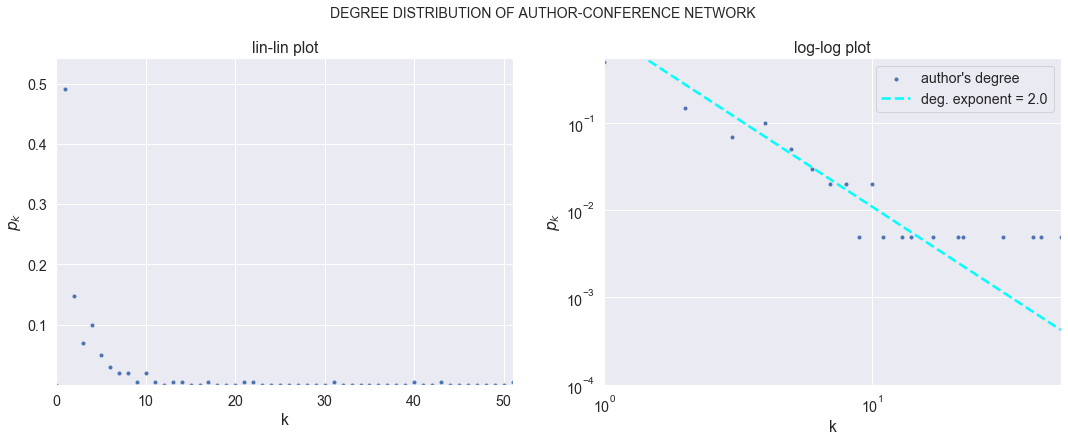

In [31]:
degree_counts = degree_histogram
degree = list(range(len(degree_histogram)))

coeff = 1.1
power = -2.0
x = np.linspace(1, max(degree), num=10)
y = coeff * x**power
legend_labels = ['author\'s degree', 'deg. exponent = ' + str(-1*power)]
filler_space = 0.05

# Plotting graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Degree Distribution of author-conference network'.upper(), y=1.0, fontsize=14)

# Plot lin-lin graph on the left column
plt.subplot(1, 2, 1)

plt.xlabel(r'k')
plt.xlim(0, max(degree) + filler_space)
plt.ylabel(r'$p_k$')
plt.ylim(0.0001, max(prob_k) + filler_space)

#plt.legend(loc='best') # 'upper left'
plt.scatter(degree, prob_k, marker='.')
plt.title(r'lin-lin plot')
plt.grid(True)

# Plot log-log graph on the right column
plt.subplot(1, 2, 2)
plt.xlabel('k')
plt.xscale('log')
plt.xlim(1, max(degree) + filler_space)
plt.ylabel(r'$p_k$')
plt.yscale('log')
plt.ylim(0.0001, max(prob_k) + filler_space)

plt.scatter(degree, prob_k, marker='.', label=legend_labels[0])
plt.title('log-log plot')

# '$f(x) = '+str(power)+'\cdot x + \log('+ str(coeff) + ')$'
plt.plot(x, y, '--', linewidth=2.5, color='cyan', label=legend_labels[1])
plt.legend(loc='best')

# Change the order displayed in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.show()

## The plot above show that probability distributions for "author-conference" network tend to follow power-law as well

In [32]:
from collections import Counter
degree_dict = Counter(degree_dict)

degree_dict

Counter({'Xi Lin': 1,
         'CIKM': 31,
         'Yequan Wang': 1,
         'Xiaokui Xiao': 3,
         'Zengxiang Li': 1,
         'Sourav S. Bhowmick': 51,
         'Adam Jatowt': 5,
         'Ricardo Campos 0001': 1,
         'Antoine Doucet': 1,
         'Yijun Duan': 1,
         'DASFAA (1)': 13,
         'Masatoshi Yoshikawa': 1,
         'GRADES/NDA@SIGMOD/PODS': 1,
         'Chaohui Wang': 1,
         'ICDE': 40,
         'Miao Xie': 1,
         'Byron Choi': 6,
         'Shuigeng Zhou': 4,
         'Nathan Ng': 1,
         'Peipei Yi': 1,
         'Zhiwei Zhang': 1,
         'Jianliang Xu': 2,
         'Christina Lui': 1,
         'SIGIR': 10,
         'Kai Huang': 1,
         'SIGMOD Conference': 43,
         'Huey Eng Chua': 6,
         'Renchi Yang': 1,
         'Zhewei Wei': 1,
         'Jun Zhao': 1,
         'Rong Hua Li': 1,
         'Siyuan Liu': 1,
         'Wanlu Zhang': 1,
         'Shu Wang': 1,
         'Wanyi Huang': 1,
         'Shafiq R. Joty': 1,
         '

In [33]:
# Verify total number of publications for author from python script
#publications_list = [1, 3, 1, 1, 7, 1, 1, 18, 1, 1, 12, 7, 5, 18, 1, 3, 1, 4, 3, 2,
#                     4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 16, 1, 2, 1, 1, 1, 1, 3, 1, 2,
#                     2, 1, 1, 4, 1, 1, 6, 16, 1, 1, 1, 1, 1, 2, 3]

publications_list = [1, 3, 1, 1, 7, 1, 1, 18, 1, 1, 12, 7, 5, 18, 1, 3, 1, 4, 3, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1,
                     1, 16, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 75, 1, 4, 1, 1, 6, 16, 1, 1, 1, 1, 1, 2, 3]
sum(publications_list), len(publications_list)

(251, 56)

In [34]:
py_etree = ['CIKM', 'CIKM', 'DASFAA (1)', 'GRADES/NDA@SIGMOD/PODS', 'ICDE', 'ICDE', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'SIGMOD Conference',
            'WSDM', 'Encyclopedia of Big Data Technologies', 'Human Interaction with Graphs', 'CIKM', 'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB',
            'CIKM', 'FQAS', 'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'BCB', 'BCB', 'ICDE', 'ICDM Workshops',
            'ICDM Workshops', 'SIGMOD Conference', 'SIGMOD Conference', 'ACL (1)', 'CIKM', 'ICDE', 'ICDE', 'ICDE', 'ICDE', 'SIGMOD Conference',
            'BCB', 'BigComp', 'DEXA (1)', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'DASFAA (1)', 'DASFAA (2)',
            'CIDR', 'DASFAA (2)', 'EDBT', 'ACM Multimedia', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB', 'CIKM', 'DASFAA (1)', 'DASFAA (1)',
            'DASFAA (2)', 'EDBT', 'ICDE', 'ICDE', 'IHI', 'IHI', 'IHI', 'ICMR', 'WWW (Companion Volume)', 'BCB',
            'BCB', 'CIKM', 'DASFAA (2)', 'DASFAA (1)', 'DASFAA (1)', 'ICDE', 'ACM Multimedia', 'SIGMOD Conference', 'Social Media Modeling and Computing', 'CIKM',
            'DASFAA (1)', 'DASFAA (2)', 'ICDE', 'ACM Multimedia', 'Pacific Symposium on Biocomputing', 'SIGMOD Conference', 'CIKM', 'CIKM', 'DASFAA', 'DASFAA',
            'ICDE', 'WSM@MM', 'DEXA', 'APWeb', 'CIKM', 'OTM Conferences (1)', 'DEXA', 'CIKM', 'DASFAA', 'DASFAA',
            'DASFAA', 'DEXA', 'SIGMOD Conference', 'WWW', 'DASFAA', 'DASFAA', 'DEXA', 'ER', 'ICDE Workshops', 'ICDE',
            'KDD', 'PAKDD', 'PAKDD', 'PAKDD', 'WWW', 'Foundations and Novel Approaches in Data Mining', 'CIKM', 'CIKM', 'CIKM', 'DASFAA',
            'DASFAA', 'DASFAA', 'DEXA', 'DEXA', 'DEXA', 'DEXA', 'CIKM', 'CIKM', 'CoopIS/DOA/ODBASE (2)', 'DASFAA',
            'DaWaK', 'DaWaK', 'DEXA', 'DEXA', 'DEXA', 'ER', 'MMDB', 'MMDB', 'PAKDD', 'PKDD',
            'CIKM', 'DEXA', 'DEXA', 'DEXA Workshops', 'EC-Web', 'ER (Workshops)', 'ER', 'ICDE', 'Mobile Data Management', 'CoopIS/DOA/ODBASE',
            'DaWaK', 'DEXA', 'DEXA', 'DEXA Workshops', 'DEXA Workshops', 'EC-Web', 'EC-Web', 'VLDB', 'WISE Workshops', 'DEXA',
            'DEXA', 'DOLAP', 'ICDCS', 'ICPADS', 'Kyoto International Conference on Digital Libraries', 'Kyoto International Conference on Digital Libraries', 'DASFAA', 'DaWaK', 'ICSC', 'IDEAS',
            'ADL', 'DEXA', 'ER Workshops', 'ER', 'ER Workshops', 'FODO']

py_sax = ['CIKM', 'CIKM', 'DASFAA (1)', 'GRADES/NDA@SIGMOD/PODS', 'ICDE', 'ICDE', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'SIGMOD Conference',
          'WSDM', 'CIKM', 'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB', 'CIKM', 'FQAS',
          'ICDE', 'SIGIR', 'SIGIR', 'SIGMOD Conference', 'BCB', 'BCB', 'ICDE', 'ICDM Workshops', 'ICDM Workshops', 'SIGMOD Conference',
          'SIGMOD Conference', 'ACL (1)', 'CIKM', 'ICDE', 'ICDE', 'ICDE', 'ICDE', 'SIGMOD Conference', 'BCB', 'BigComp',
          'DEXA (1)', 'SIGIR', 'SIGMOD Conference', 'SIGMOD Conference', 'WWW (Companion Volume)', 'WWW (Companion Volume)', 'DASFAA (1)', 'DASFAA (2)', 'CIDR', 'DASFAA (2)',
          'EDBT', 'ACM Multimedia', 'SIGMOD Conference', 'SIGMOD Conference', 'BCB', 'CIKM', 'DASFAA (1)', 'DASFAA (1)', 'DASFAA (2)', 'EDBT',
          'ICDE', 'ICDE', 'IHI', 'IHI', 'IHI', 'ICMR', 'WWW (Companion Volume)', 'BCB', 'BCB', 'CIKM', 
          'DASFAA (2)', 'DASFAA (1)', 'DASFAA (1)', 'ICDE', 'ACM Multimedia', 'SIGMOD Conference', 'CIKM', 'DASFAA (1)', 'DASFAA (2)', 'ICDE',
          'ACM Multimedia', 'Pacific Symposium on Biocomputing', 'SIGMOD Conference', 'CIKM', 'CIKM', 'DASFAA', 'DASFAA', 'ICDE', 'WSM@MM', 'DEXA',
          'APWeb', 'CIKM', 'OTM Conferences (1)', 'DEXA', 'CIKM', 'DASFAA', 'DASFAA', 'DASFAA', 'DEXA', 'SIGMOD Conference',
          'WWW', 'DASFAA', 'DASFAA', 'DEXA', 'ER', 'ICDE Workshops', 'ICDE', 'KDD', 'PAKDD', 'PAKDD',
          'PAKDD', 'WWW', 'CIKM', 'CIKM', 'CIKM', 'DASFAA', 'DASFAA', 'DASFAA', 'DEXA', 'DEXA',
          'DEXA', 'DEXA', 'CIKM', 'CIKM', 'CoopIS/DOA/ODBASE (2)', 'DASFAA', 'DaWaK', 'DaWaK', 'DEXA', 'DEXA',
          'DEXA', 'ER', 'MMDB', 'MMDB', 'PAKDD', 'PKDD', 'CIKM', 'DEXA', 'DEXA', 'DEXA Workshops',
          'EC-Web', 'ER (Workshops)', 'ER', 'ICDE', 'Mobile Data Management', 'CoopIS/DOA/ODBASE', 'DaWaK', 'DEXA', 'DEXA', 'DEXA Workshops',
          'DEXA Workshops', 'EC-Web', 'EC-Web', 'VLDB', 'WISE Workshops', 'DEXA', 'DEXA', 'DOLAP', 'ICDCS', 'ICPADS',
          'Kyoto International Conference on Digital Libraries', 'Kyoto International Conference on Digital Libraries', 'DASFAA', 'DaWaK', 'ICSC', 'IDEAS', 'ADL', 'DEXA', 'ER Workshops', 'ER',
          'ER Workshops', 'FODO']

common_venues = sorted(intersection(py_etree, py_sax))
print("Unique intersected booktitles/venues :\n", common_venues)
print("No. of unique intersected booktitles/venues :", len(common_venues))
unwanted_tags = set(py_etree).symmetric_difference(common_venues)
print("Booktitles/venues found in unwanted xml_tags :\n", unwanted_tags)

Unique intersected booktitles/venues :
 ['ACL (1)', 'ACM Multimedia', 'ADL', 'APWeb', 'BCB', 'BigComp', 'CIDR', 'CIKM', 'CoopIS/DOA/ODBASE', 'CoopIS/DOA/ODBASE (2)', 'DASFAA', 'DASFAA (1)', 'DASFAA (2)', 'DEXA', 'DEXA (1)', 'DEXA Workshops', 'DOLAP', 'DaWaK', 'EC-Web', 'EDBT', 'ER', 'ER (Workshops)', 'ER Workshops', 'FODO', 'FQAS', 'GRADES/NDA@SIGMOD/PODS', 'ICDCS', 'ICDE', 'ICDE Workshops', 'ICDM Workshops', 'ICMR', 'ICPADS', 'ICSC', 'IDEAS', 'IHI', 'KDD', 'Kyoto International Conference on Digital Libraries', 'MMDB', 'Mobile Data Management', 'OTM Conferences (1)', 'PAKDD', 'PKDD', 'Pacific Symposium on Biocomputing', 'SIGIR', 'SIGMOD Conference', 'VLDB', 'WISE Workshops', 'WSDM', 'WSM@MM', 'WWW', 'WWW (Companion Volume)']
No. of unique intersected booktitles/venues : 51
Booktitles/venues found in unwanted xml_tags :
 {'Encyclopedia of Big Data Technologies', 'Social Media Modeling and Computing', 'Foundations and Novel Approaches in Data Mining', 'Human Interaction with Graphs'}


# End of Program

## Observations from xml parsing script for "BhowmickSouravS.xml"
- "article, book, incollection, inproceedings, mastersthesis, phdthesis, proceedings, www" defined in xml_tags.txt
- more xml tags to check will incur more computing time and memory resources
- dblp refined by "Books and Theses, Conferences and Workshop Papers, Parts in Books or Collections, Editorship, Reference Works"

- With "inproceedings" and "proceedings" in xml_tags.txt and unwanted tags in ['article', 'book', 'incollection', 'mastersthesis', 'phdthesis', 'www']
- 2 elements, b1 and b2 in "Books and Theses" are without booktitle and
- List of book titles not in the required xml_tags :
 ['Encyclopedia of Big Data Technologies', 'Human Interaction with Graphs', 'Social Media Modeling and Computing', 'Foundations and Novel Approaches in Data Mining']
- giving total counts of 172 (= 178 - 2 - 4) instead of 178 with "xml_parse_conferences.py"

## Titles with no authors :
------------------------------------------------------------------------------------------------------------------------------------
Element No. : 85
2014, DASFAA (1), 
No. of authors : 0
Database Systems for Advanced Applications 19th International Conference DASFAA 2014 Bali Indonesia April 21 24 2014 Proceedings Part I 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 86
2014, DASFAA (2), 
No. of authors : 0
Database Systems for Advanced Applications 19th International Conference DASFAA 2014 Bali Indonesia April 21 24 2014 Proceedings Part II 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 140
2009, DEXA, 
No. of authors : 0
Database and Expert Systems Applications 20th International Conference DEXA 2009 Linz Austria August 31 September 4 2009 Proceedings 
Element Tag : proceedings

------------------------------------------------------------------------------------------------------------------------------------

Element No. : 146
2008, DEXA, 
No. of authors : 0
Database and Expert Systems Applications 19th International Conference DEXA 2008 Turin Italy September 1 5 2008 Proceedings 
Element Tag : proceedings
    


## Note : The "authors" and "venues" can be replaced with "Node IDs" and "Locations" respectively for performing similar graph analysis